# MUFFINS VS CHIHUAHUA

### CNN + Hotdog
using the Machine Learning Image Classification Models to classsify whether a set of given image falls in either of the two distinct classes

### Import Libraries and Dependancies

In [5]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imghdr
import warnings

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

warnings.filterwarnings("ignore")


C:\Users\antonie\AppData\Local\Temp\ipykernel_13408\774538224.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:

# configure how the library handles GPU memory allocation. 

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# When 'set_memory_growth' is set to True, TensorFlow will not allocate all available GPU memory upfront 
# but will grow the memory usage as needed by the application. This can be useful to avoid out-of-memory errors and 
#to allow multiple processes to share the same GPU.

### Data Preparations

In [7]:
data_dir = '..\data'

file_ext = ['jpg','jpeg','png','bmp','gif']

classes = os.listdir(data_dir)
classes

['chihuahua', 'muffin']

In [8]:
for image_path in os.listdir(data_dir):
    for i, image in enumerate(os.listdir(os.path.join(data_dir, image_path))):
        # print(i, image)
        try:
            img = cv2.imread(image)
            tip = imghdr.what(image)
            if tip not in file_ext:
                print(f'Unsupported Format {image}')
                break
        except Exception as e:
            print(f'Supported format {image}')
            break
            

Supported format 1000_F_325918849_xQEYnnEI2PbwLRjZ8WKoI0IEjQ5ISzWG.jpg
Supported format 03COOKING-JORDANMARSHMUFFIN2-threeByTwoMediumAt2X-v2.jpg


### Data Initialization

In [9]:
keras_data = tf.keras.utils.image_dataset_from_directory(data_dir)
print(keras_data)

keras_data = keras_data.map(lambda x, y: (x/255, y))

batch = keras_data.as_numpy_iterator().next()

Found 7044 files belonging to 2 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
batch[0][0]

array([[[0.9657535 , 0.9835634 , 0.96967506],
        [0.9894499 , 0.99482065, 0.98552835],
        [0.9845056 , 0.9871199 , 0.97166854],
        ...,
        [0.9858799 , 0.97288704, 0.9836229 ],
        [0.9959168 , 0.9882123 , 0.99213386],
        [0.9990252 , 0.9937173 , 0.9976389 ]],

       [[0.9606215 , 0.977331  , 0.96454304],
        [0.9681912 , 0.9756084 , 0.96426964],
        [0.99677604, 0.9977833 , 0.98988265],
        ...,
        [0.9991078 , 0.9931066 , 0.9991078 ],
        [0.9963159 , 0.9963029 , 0.9963159 ],
        [0.98154336, 0.98154336, 0.98154336]],

       [[0.97262233, 0.97669065, 0.9756324 ],
        [0.9937244 , 0.99652004, 0.9946971 ],
        [0.88263017, 0.8794376 , 0.8730525 ],
        ...,
        [0.8119044 , 0.7970453 , 0.80893254],
        [0.9807399 , 0.9853086 , 0.984447  ],
        [0.99607843, 1.        , 1.        ]],

       ...,

       [[0.967749  , 0.97974867, 0.96741074],
        [0.9744237 , 0.96384996, 0.9680358 ],
        [0.58310246, 0

In [11]:
batch[1].shape

(32,)

In [12]:
batch[0].max()

1.0

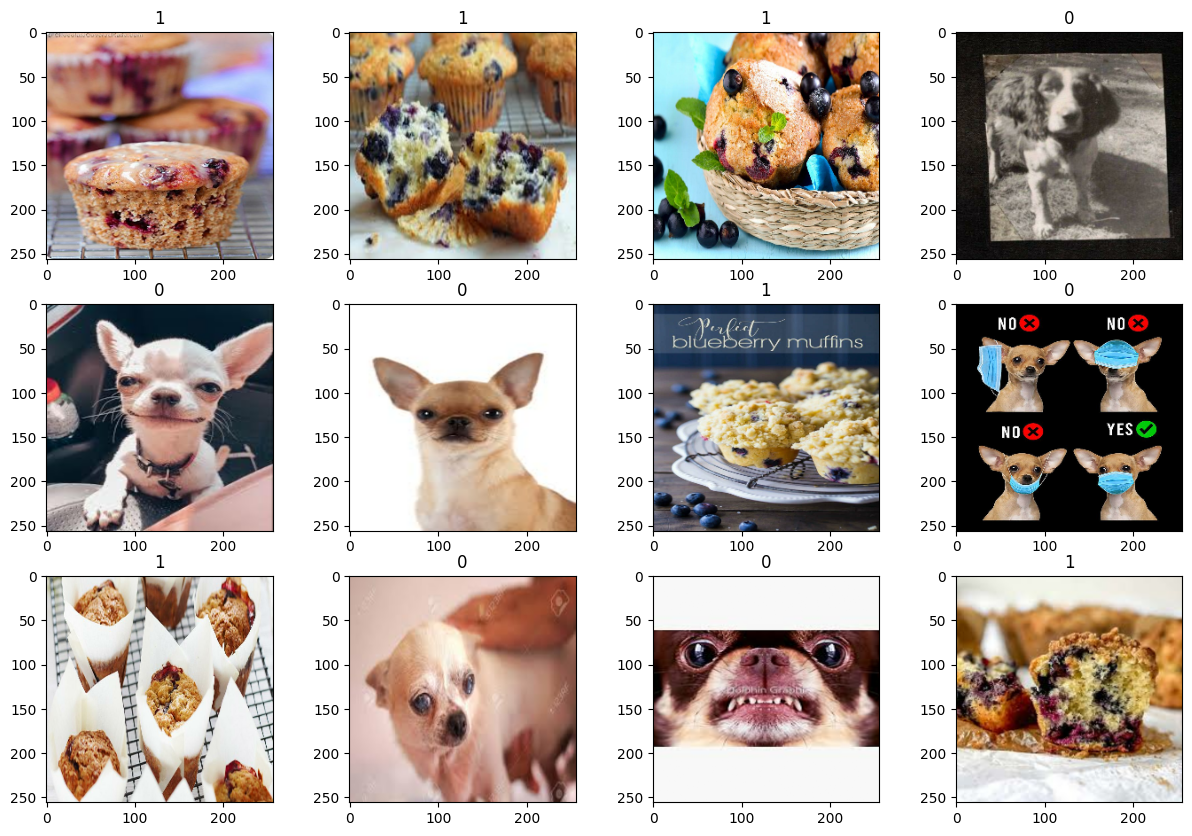

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:12]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Splitting the Dataset

In [14]:
train_size = int(len(keras_data) * .7)
val_size = int(len(keras_data) * .2)
test_size = int(len(keras_data) * .1) + 1

In [15]:
train = keras_data.take(train_size)
val = keras_data.skip(train_size).take(val_size)
test = keras_data.skip(train_size + val_size).take(test_size)

In [16]:
train_size + val_size + test_size

221

In [17]:
len(test)

23

### Convolutional Neural Network ML Model

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.losses.binary_crossentropy)

### Model Training

In [22]:
logs = '../logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logs)

In [24]:
def is_image_file(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_image_file(file_path):
                print(f"Unsupported image file format: {file_path}")
            else:
                try:
                    image = tf.io.read_file(file_path)
                    tf.image.decode_image(image, channels=3)
                except tf.errors.InvalidArgumentError:
                    print(f"Invalid image format for file: {file_path}")
                # os.remove(file_path)
                    

# Path to the directory containing images
directory_path = data_dir

# Check images in the directory
check_images_in_directory(directory_path)

In [25]:
history = model.fit(train, epochs=10, validation_data = val, callbacks=tensorboard_callback, shuffle=True)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1041s 7s/step - accuracy: 0.7084 - loss: 0.6591 - val_accuracy: 0.8750 - val_loss: 0.3026
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1876s 12s/step - accuracy: 0.8705 - loss: 0.3084 - val_accuracy: 0.8352 - val_loss: 0.3962
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 646s 4s/step - accuracy: 0.8931 - loss: 0.2689 - val_accuracy: 0.8828 - val_loss: 0.3079
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 733s 5s/step - accuracy: 0.9144 - loss: 0.2131 - val_accuracy: 0.9077 - val_loss: 0.2291
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2539s 17s/step - accuracy: 0.9468 - loss: 0.1370 - val_accuracy: 0.9112 - val_loss: 0.2531
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 628s 4s/step - accuracy: 0.9672 - loss: 0.0857 - val_accuracy: 0.9084 - val_loss: 0.2873
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 436s 3s/step - accuracy: 0.9792 - loss: 0.0589 - val_accuracy: 0.9219 - val_loss: 0.2696
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 433s 3s/step - accuracy: 0.9840 - loss: 0.0523 - val

In [26]:
os.listdir('../logs')

['train', 'validation']

In [27]:
history.history

{'accuracy': [0.7915990352630615,
  0.8825080990791321,
  0.9042207598686218,
  0.9314123392105103,
  0.9492694735527039,
  0.9732142686843872,
  0.9853895902633667,
  0.9855925440788269,
  0.9904626607894897,
  0.9888392686843872],
 'loss': [0.4555441737174988,
  0.28315651416778564,
  0.24066518247127533,
  0.17150473594665527,
  0.12925158441066742,
  0.07793551683425903,
  0.04362645000219345,
  0.04376326873898506,
  0.030405323952436447,
  0.033735278993844986],
 'val_accuracy': [0.875,
  0.8352272510528564,
  0.8828125,
  0.9076704382896423,
  0.9112215638160706,
  0.9083806872367859,
  0.921875,
  0.9190340638160706,
  0.9197443127632141,
  0.9190340638160706],
 'val_loss': [0.3026478588581085,
  0.39618557691574097,
  0.3078955113887787,
  0.22907830774784088,
  0.25311753153800964,
  0.2872893810272217,
  0.26959553360939026,
  0.30712905526161194,
  0.337381511926651,
  0.3603779077529907]}

### Plot the Performance

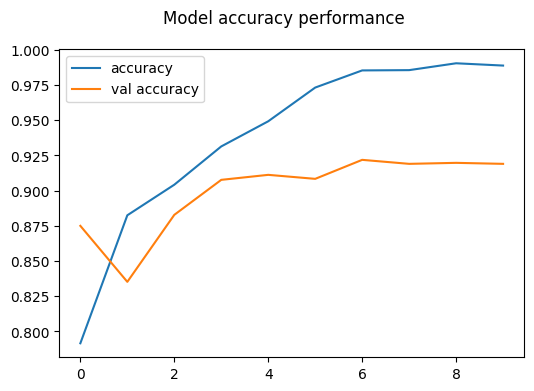

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.suptitle('Model accuracy performance')
plt.legend(loc='upper left')

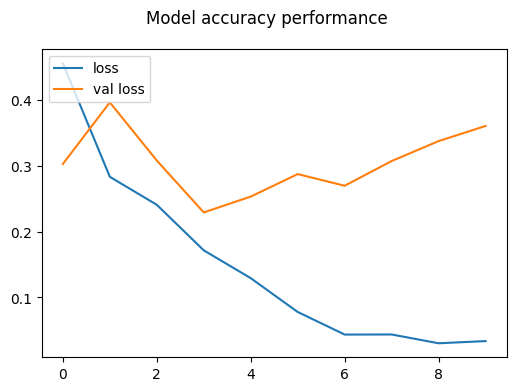

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.suptitle('Model accuracy performance')
plt.legend(loc='upper left')

### Evaluate the Performance

In [30]:
prec = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [31]:
len(test)

23

In [32]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    prec.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    bin_acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


In [33]:
print(f'Precision Score: {round(prec.result().numpy(), 2)}, Recall Score: {rec.result().numpy()}, Binary Accuracy Score: {bin_acc.result().numpy()}')

Precision Score: 0.8600000143051147, Recall Score: 0.9641790986061096, Binary Accuracy Score: 0.9067796468734741


### Experimental Testing

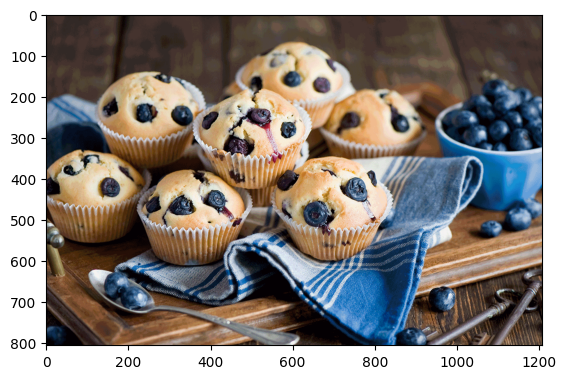

In [34]:
img = cv2.imread(r"D:\Downloads\muffins8.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [35]:
img_resize = tf.image.resize(img, (256, 256))


In [36]:
np.expand_dims(img_resize, 0).shape

(1, 256, 256, 3)

In [37]:
new_prediction = model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [38]:
# new_prediction * 255
# new_prediction * 100
new_prediction.item()

0.9995849132537842

In [39]:
conf_ = int((new_prediction*100) * new_prediction) / 100
conf_ = conf_ * 100
print((1 - new_prediction)*100)
print(new_prediction*100)

[[0.04150867]]
[[99.95849]]


In [40]:
threshold = 0.5

clipped_output = np.clip(new_prediction, 0.1, 0.9) >= threshold
clipped_output.astype(int)

array([[1]])

In [41]:
if new_prediction > 0.5:
    print(f'Im Muffing on without You !!')
    print(f'The model is {conf_}% conf that this is a Cupcake')
else:
    print(f'Life is better with a Chihuahua')
    print(f'The model is {conf_}% conf that this is a Chihuahua')

Im Muffing on without You !!
The model is 99.0% conf that this is a Cupcake


In [42]:
len(test)

23

### Save the Model

In [43]:
model.save(os.path.join('..\model', 'muffvschi.h5'))

In [44]:
new_model = load_model(os.path.join('..\model','muffvschi.h5'))

In [45]:
another_prediction = new_model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


In [46]:
another_prediction

array([[0.9995849]], dtype=float32)

In [47]:
scenarios = {
	    "earthquake": "If you are experiencing an earthquake, drop, cover, and hold on until the shaking stops. Stay indoors if you are already there.",
	    "flood": "If you are experiencing a flood, move to higher ground immediately. Do not walk or drive through flood waters.",
	    "fire": "If you are experiencing a fire, evacuate the building immediately. Call the fire department and do not use elevators.",
	    "hurricane": "If you are experiencing a hurricane, stay indoors away from windows. Follow evacuation orders from local authorities if given.",
	    "tornado": "If you are experiencing a tornado, take shelter in a basement or an interior room on the lowest floor. Avoid windows and cover yourself with a mattress or heavy blankets.",
	    "tsunami": "If you are experiencing a tsunami, move to higher ground as quickly as possible. Stay away from the beach and coastal areas.",
	    "volcanic eruption": "If you are experiencing a volcanic eruption, evacuate the area immediately if advised to do so. Stay indoors to avoid ash and falling debris.",
	    "wildfire": "If you are experiencing a wildfire, evacuate the area immediately if instructed to do so. Close all windows and doors to prevent smoke from entering your home.",
	    "blizzard": "If you are experiencing a blizzard, stay indoors and keep warm. Avoid traveling and stock up on food, water, and emergency supplies.",
	    "heatwave": "If you are experiencing a heatwave, stay indoors and keep cool. Drink plenty of water and avoid strenuous activities during the hottest part of the day.",
	    "landslide": "If you are experiencing a landslide, move to higher ground and stay away from the path of the slide. Listen to local authorities for evacuation orders.",
	    "avalanche": "If you are experiencing an avalanche, try to move to the side of the avalanche path and grab onto something sturdy. If buried, create an air pocket around your face and wait for rescuers.",
	    "drought": "If you are experiencing a drought, conserve water by reducing usage. Follow local water restrictions and use drought-resistant plants in your garden.",
	    "pandemic": "If you are experiencing a pandemic, follow public health guidelines such as wearing masks, practicing social distancing, and getting vaccinated. Stay informed through reliable sources.",
	    "chemical spill": "If you are experiencing a chemical spill, evacuate the area immediately and avoid contact with the chemicals. Follow instructions from emergency personnel.",
	    "nuclear accident": "If you are experiencing a nuclear accident, seek shelter indoors in a basement or interior room. Seal windows and doors, and listen to local authorities for evacuation instructions.",
	    "power outage": "If you are experiencing a power outage, use flashlights instead of candles to avoid fire hazards. Keep your refrigerator and freezer doors closed to preserve food.",
	    "terrorist attack": "If you are experiencing a terrorist attack, move to a safe location and follow instructions from law enforcement. Avoid crowded areas and stay informed through reliable sources.",
	    "cyber attack": "If you are experiencing a cyber attack, disconnect from the internet and do not use compromised devices. Report the attack to your IT department or relevant authorities.",
	    "severe storm": "If you are experiencing a severe storm, stay indoors and away from windows. Secure outdoor objects that could become projectiles and listen to weather updates.",
	    "thunderstorm": "If you are experiencing a thunderstorm, stay indoors and avoid using electrical appliances. Stay away from windows and avoid taking shelter under trees.",
	    "sandstorm": "If you are experiencing a sandstorm, stay indoors and keep windows and doors closed. Wear a mask to avoid inhaling dust and reduce outdoor activities.",
	    "cold wave": "If you are experiencing a cold wave, stay indoors and keep warm. Dress in layers and avoid prolonged exposure to the cold.",
	    "hailstorm": "If you are experiencing a hailstorm, stay indoors and away from windows. Protect your vehicle by moving it to a covered area if possible.",
	    "fog": "If you are experiencing fog, drive with caution and use low-beam headlights. Avoid speeding and keep a safe distance from other vehicles.",
	    "famine": "If you are experiencing a famine, seek assistance from local authorities and humanitarian organizations. Conserve food and resources and follow guidelines for aid distribution.",
	    "locust plague": "If you are experiencing a locust plague, protect crops by using approved pesticides and following agricultural guidelines. Report sightings to local authorities.",
	    "mine collapse": "If you are experiencing a mine collapse, evacuate the area immediately and follow instructions from emergency personnel. Avoid entering unstable areas.",
	    "building collapse": "If you are experiencing a building collapse, evacuate the area immediately and avoid using elevators. Report the incident to emergency services and assist others if safe to do so.",
	    "road accident": "If you are experiencing a road accident, move to a safe location and call emergency services. Provide first aid to the injured and avoid obstructing traffic."
	}

In [48]:
scenes = [i for i in scenarios.keys()]

In [49]:
scenes

['earthquake',
 'flood',
 'fire',
 'hurricane',
 'tornado',
 'tsunami',
 'volcanic eruption',
 'wildfire',
 'blizzard',
 'heatwave',
 'landslide',
 'avalanche',
 'drought',
 'pandemic',
 'chemical spill',
 'nuclear accident',
 'power outage',
 'terrorist attack',
 'cyber attack',
 'severe storm',
 'thunderstorm',
 'sandstorm',
 'cold wave',
 'hailstorm',
 'fog',
 'famine',
 'locust plague',
 'mine collapse',
 'building collapse',
 'road accident']

In [50]:
data_dir = '../data/muffin'
for i in os.listdir(data_dir):
    print(i)
    break

03COOKING-JORDANMARSHMUFFIN2-threeByTwoMediumAt2X-v2.jpg
